In [ ]:
https://www.kaggle.com/competitions/advanced-dls-spring-2021

In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
df = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на случайные 15 строк

In [6]:
df.sample(n = 15)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2546,27,20.25,538.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
729,2,62.15,113.1,Female,0,Yes,No,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,0
15,30,90.05,2627.2,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
2037,12,96.05,1148.1,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
418,58,50.30,2878.55,Male,0,Yes,No,Yes,No,DSL,No,No,Yes,No,No,No,One year,No,Credit card (automatic),0
5197,28,91.25,2483.65,Male,0,No,No,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
1029,34,64.35,2053.05,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,Yes,One year,No,Electronic check,0
3999,12,54.20,690.5,Female,0,Yes,No,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),0
4226,10,104.40,1081.45,Male,0,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4323,51,85.50,4421.95,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

У нас 5282 строки и 20 стобцов (19 признаков и целевая переменная)

Посмотрим на количество пропусков (NaN или None) в каждом столбце

In [8]:
print(np.sum(df.isnull()))

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


Встроенные методы pandas не нашли пропусков

Заметим, что столбец "TotalSpent" во фреймворке имеет тип object, хотя указан как числовой признак. Применим функцию to_numeric для него

Посмотрим на сам столбец

In [9]:
df["TotalSpent"]

0       1026.35
1        1872.2
2          75.9
3          2570
4       6758.45
         ...   
5277      82.15
5278    2188.45
5279      55.05
5280    2215.25
5281     1375.6
Name: TotalSpent, Length: 5282, dtype: object

Применим to_numeric (pandas сам поймет, что нужно присвоить тип данных float64 - это видно из верхней клетки, там есть нецелые значения)

In [10]:
df["TotalSpent"] = pd.to_numeric(df["TotalSpent"])

ValueError: ignored

Получили ошибку. Посмотрим внимательнее на значения данного столбца

In [11]:
print(df["TotalSpent"].unique(), len(df["TotalSpent"].unique()))

['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6'] 4978


Ничего необычного пока не видно, но в ошибке стоит, что у нас есть элемент " ". Давай отсортируем строки, чтобы точно убедиться в наличии " ".

In [12]:
print(sorted(df["TotalSpent"].unique()), len(df["TotalSpent"].unique()))

[' ', '100.2', '100.25', '100.35', '100.4', '100.9', '1001.5', '1003.05', '1004.35', '1004.5', '1004.75', '1005.7', '1007.8', '1007.9', '1008.55', '1008.7', '1009.25', '101.1', '101.65', '101.9', '1010', '1011.5', '1012.4', '1013.2', '1013.35', '1013.6', '1014.25', '1016.7', '102.5', '102.75', '1020.2', '1020.75', '1021.55', '1021.75', '1021.8', '1022.6', '1023.85', '1023.9', '1024', '1024.7', '1025.05', '1025.15', '1025.95', '1026.35', '1027.25', '1028.75', '1028.9', '1029.35', '103.7', '1031.1', '1031.4', '1031.7', '1032', '1032.05', '1033', '1033.9', '1033.95', '1035.5', '1035.7', '1036', '1036.75', '1037.75', '1039.45', '104.3', '1041.8', '1042.65', '1043.3', '1043.35', '1043.4', '1043.8', '1046.1', '1046.5', '1047.7', '1048.45', '1048.85', '1049.05', '1049.6', '105.6', '1050.5', '1051.05', '1051.9', '1052.35', '1052.4', '1054.6', '1054.75', '1054.8', '1055.9', '1057', '1057.55', '1057.85', '1059.55', '106.2', '106.85', '106.9', '1060.2', '1060.6', '1062.1', '1064.65', '1064.95', '

Сейчас можно быть уверенным, что в столбце "TotalSpent" встречается значение " ", которое является пропуском. Его надо заполнить числом. Заполним его, например, числом 0.0 - оно не встречается.

In [13]:
df["TotalSpent"] = df["TotalSpent"].replace(' ', '0.0')

Убедимся, что все хорошо

In [14]:
print(sorted(df["TotalSpent"].unique()), len(df["TotalSpent"].unique()))

['0.0', '100.2', '100.25', '100.35', '100.4', '100.9', '1001.5', '1003.05', '1004.35', '1004.5', '1004.75', '1005.7', '1007.8', '1007.9', '1008.55', '1008.7', '1009.25', '101.1', '101.65', '101.9', '1010', '1011.5', '1012.4', '1013.2', '1013.35', '1013.6', '1014.25', '1016.7', '102.5', '102.75', '1020.2', '1020.75', '1021.55', '1021.75', '1021.8', '1022.6', '1023.85', '1023.9', '1024', '1024.7', '1025.05', '1025.15', '1025.95', '1026.35', '1027.25', '1028.75', '1028.9', '1029.35', '103.7', '1031.1', '1031.4', '1031.7', '1032', '1032.05', '1033', '1033.9', '1033.95', '1035.5', '1035.7', '1036', '1036.75', '1037.75', '1039.45', '104.3', '1041.8', '1042.65', '1043.3', '1043.35', '1043.4', '1043.8', '1046.1', '1046.5', '1047.7', '1048.45', '1048.85', '1049.05', '1049.6', '105.6', '1050.5', '1051.05', '1051.9', '1052.35', '1052.4', '1054.6', '1054.75', '1054.8', '1055.9', '1057', '1057.55', '1057.85', '1059.55', '106.2', '106.85', '106.9', '1060.2', '1060.6', '1062.1', '1064.65', '1064.95',

Теперь преобразуем

In [15]:
df["TotalSpent"] = pd.to_numeric(df["TotalSpent"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Столбец "TotalSpent" теперь типа float64 - числовой. 

Как мы помним, встроенные методы pandas не нашли пропусков, однако посмотрим на данные более внимательно, учитывая предыдущий пример. Для этого выведем для каждого признака уникальные значения. Для категориальных просто уникальные, для числовых отсортируем

In [17]:
for col in cat_cols:
    print(df[col].unique(), len(df[col].unique()))

['Male' 'Female'] 2
[0 1] 2
['Yes' 'No'] 2
['Yes' 'No'] 2
['Yes' 'No'] 2
['No' 'Yes' 'No phone service'] 3
['No' 'Fiber optic' 'DSL'] 3
['No internet service' 'No' 'Yes'] 3
['No internet service' 'No' 'Yes'] 3
['No internet service' 'No' 'Yes'] 3
['No internet service' 'Yes' 'No'] 3
['No internet service' 'No' 'Yes'] 3
['No internet service' 'No' 'Yes'] 3
['One year' 'Two year' 'Month-to-month'] 3
['No' 'Yes'] 2
['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)'] 4


In [18]:
for col in num_cols:
    print(sorted(df[col].unique()), len(df[col].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72] 73
[18.25, 18.4, 18.7, 18.8, 18.85, 18.9, 18.95, 19.0, 19.05, 19.1, 19.15, 19.2, 19.25, 19.3, 19.35, 19.4, 19.45, 19.5, 19.55, 19.6, 19.65, 19.7, 19.75, 19.8, 19.85, 19.9, 19.95, 20.0, 20.05, 20.1, 20.15, 20.2, 20.25, 20.3, 20.35, 20.4, 20.45, 20.5, 20.55, 20.6, 20.65, 20.7, 20.75, 20.8, 20.85, 20.9, 20.95, 21.0, 21.05, 21.1, 21.15, 21.2, 21.25, 21.3, 22.95, 23.15, 23.3, 23.4, 23.45, 23.5, 23.55, 23.65, 23.75, 23.8, 23.85, 23.9, 23.95, 24.0, 24.05, 24.1, 24.15, 24.2, 24.25, 24.3, 24.35, 24.4, 24.45, 24.5, 24.55, 24.6, 24.65, 24.7, 24.75, 24.8, 24.85, 24.9, 24.95, 25.0, 25.05, 25.1, 25.15, 25.2, 25.25, 25.3, 25.35, 25.4, 25.45, 25.5, 25.55, 25.6, 25.65, 25.7, 25.75, 25.8, 25.85, 25.9, 25.95, 26.0, 26.05, 26.1

Теперь в каждом из признаков "глазами" не видно пропусков

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

Для категориальных признаков при вызове метода .value_counts() получим Series. Возьмем в пример столбец 'Sex'

In [20]:
df['Sex'].value_counts()

Male      2655
Female    2627
Name: Sex, dtype: int64

Будем строить круговые диаграммы, поэтому нам понадобятся количество объектов, у которых соответствующий признак, а также само значение признака. Мы можем получить эти данные методами .index - так мы получим значение .tolist() - чтобы получить данные в типе list

In [21]:
counts = df['Sex'].value_counts().tolist()
counts

[2655, 2627]

In [22]:
labels = df['Sex'].value_counts().index.tolist()
labels

['Male', 'Female']

У нас 16 категориальных признаков, будем делать subplots, 4 строки по 4 графика - для удобства. Из предыдущего пункта мы знаем, что у нас 5282 строки. В диаграммах будем выводить проценты количества значений признака.

Сверху каждой диаграммы написан сам признак

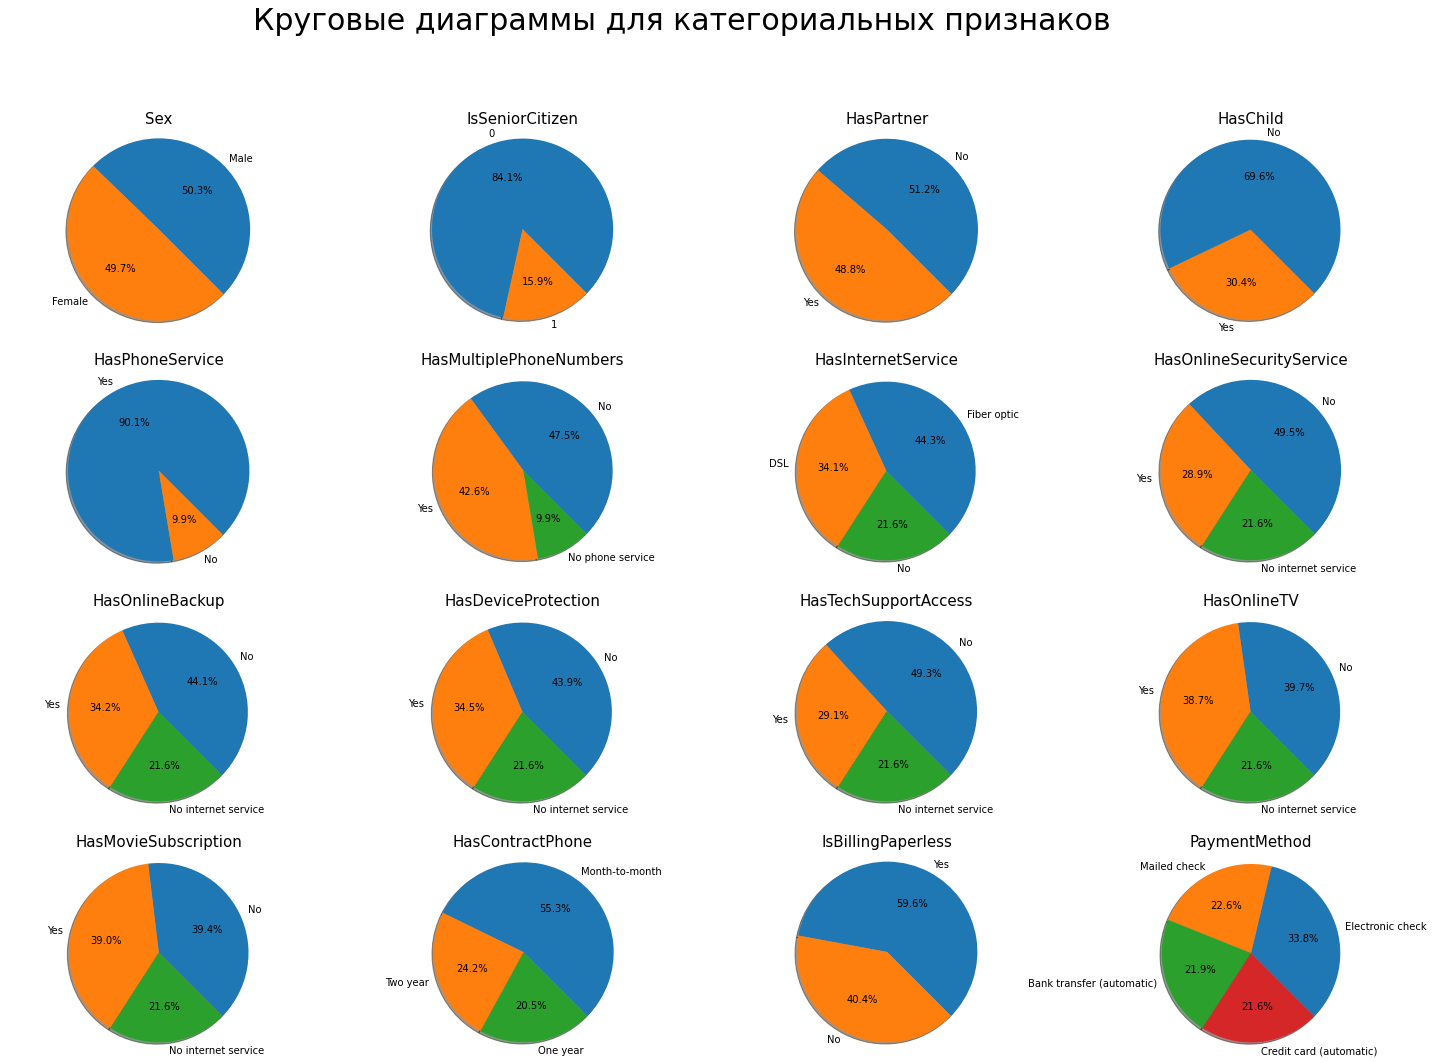

In [23]:
fig, ax = plt.subplots(4, 4, figsize=(25, 17))
fig.set_facecolor('white')
fig.suptitle('Круговые диаграммы для категориальных признаков', fontsize=30)

for i, feature in enumerate(cat_cols):
  counts = df[feature].value_counts().tolist()
  labels = df[feature].value_counts().index.tolist()
  row = i // 4
  col = i % 4
  ax[row, col].set_title(f'{feature}', fontsize = 15)
  ax[row, col].pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=-45)
  ax[row, col].axis('equal')

plt.show()

Теперь перейдем к числовым признакам

Так как визуализация гистограммами зависит от уровня детализации (bins), то давайте зададим несколько таких параметров (например 50, 100, 200) и для каждого числового признака посмотрим гистограммы с 3мя разными уровнями детализации. Для удобства сделаем все в одной таблице

Для удобства одни и те же признаки расположим на графике друг под другом

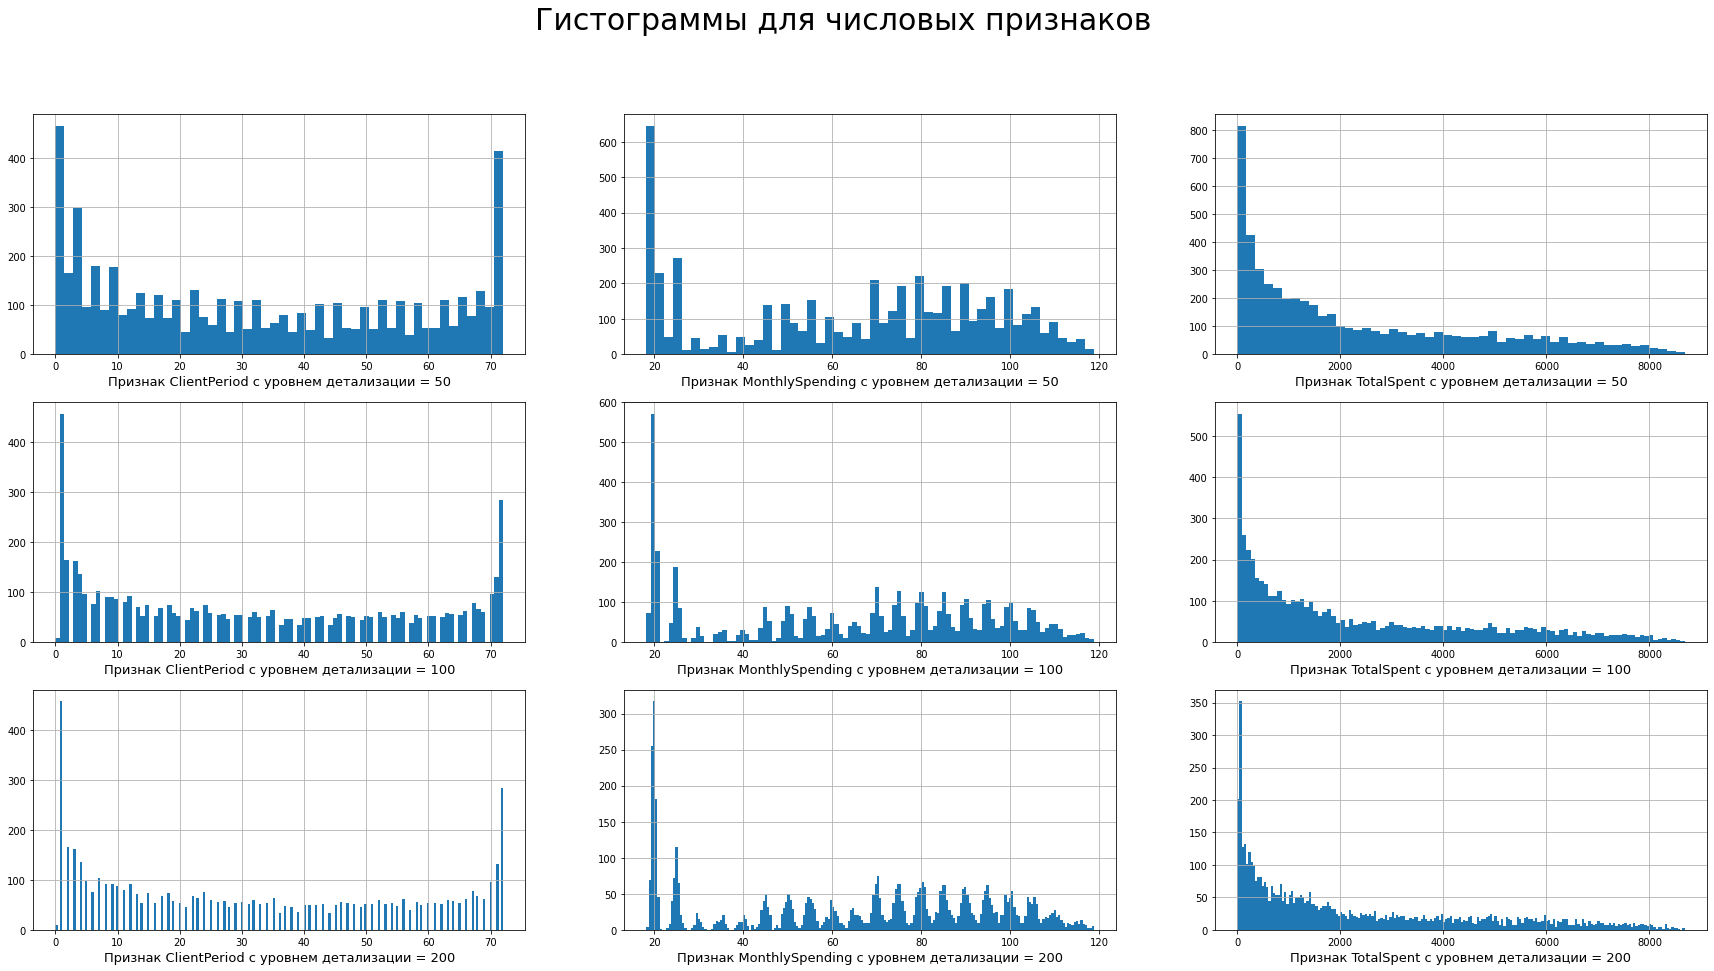

In [24]:
fig, gist = plt.subplots(len(num_cols), 3, figsize=(30,15))
fig.suptitle('Гистограммы для числовых признаков', fontsize=30)
bin_values = [50, 100, 200]

for i, feature in enumerate(num_cols):
    x = df[feature].to_numpy()
    for j in range(0, 3):
      gist[j, i].hist(x = x, bins = bin_values[j])
      gist[j, i].grid()
      gist[j, i].set_xlabel(f"Признак {feature} с уровнем детализации = {bin_values[j]}", fontsize = 13)

plt.show()

Теперь посмотрим на распределение целевой переменной

In [25]:
df[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

Со значением 0 у нас 3898 элементов, со значением 1 1384. 
Значением с классом 0 у нас в ~2.8 раз больше, чем значений с классом 1.
Будем считать, что классы являются сбалансированными

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [26]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_splitin_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve

Выделим таблицу из категориальных признаков

In [27]:
categorial_data = df[cat_cols]
categorial_data

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


Теперь сделаем one-hot encoding для категориальных признаков

In [28]:
dummy_features = pd.get_dummies(categorial_data)

Возьмем таблицу с числовыми признакам

In [29]:
numeric_data = df[num_cols]

Теперь объединим числовые признаки с dummy_features

In [30]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [31]:
y = df[target_col]
y

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64

In [32]:
X.shape

(5282, 45)

Вспомним, что у нас было 19 признаков, а сейчас их стало 45

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

Воспользуемся StandardScaler для нормировки наших признаков. Не забудем, что fit можно делать на X_train, 

In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

Теперь воспользуемся LogisticRegressionCV

In [35]:
clf = LogisticRegressionCV(cv = 5, scoring = "roc_auc", refit = True)
clf.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=5, scoring='roc_auc')

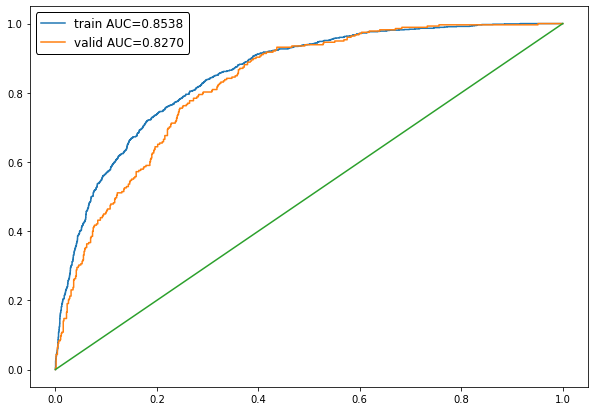

In [36]:
y_train_predicted = clf.predict_proba(X_train_scaled)[:, 1]
y_valid_predicted = clf.predict_proba(X_valid_scaled)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
valid_auc = roc_auc_score(y_valid, y_valid_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_valid, y_valid_predicted)[:2], label='valid AUC={:.4f}'.format(valid_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

На train 0.8538, на valid 0.8270

In [37]:
clf.C_

array([21.5443469])

При этом LogisticRegressionCV при 5-fold валидации подобрал C = 21.5443469, то есть это обратный элемент к слагаемому штрафу в loss-функции (loss = ... + 1/c * ||w||^2) - так как по умолчанию l2-регуляризация

Проверим, что найденный C именно этот

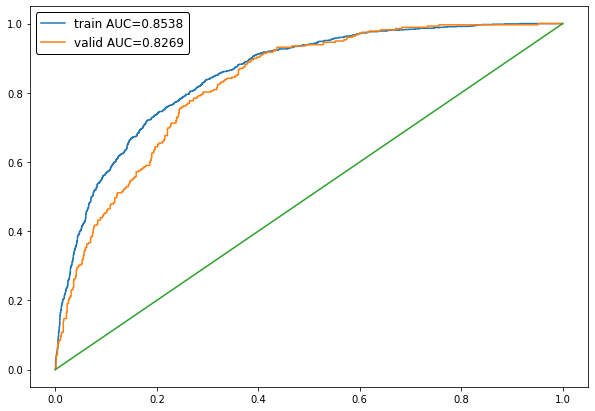

In [92]:
clf = LogisticRegression(C = 21.5443469)
clf.fit(X_train_scaled, y_train)

y_train_predicted = clf.predict_proba(X_train_scaled)[:, 1]
y_valid_predicted = clf.predict_proba(X_valid_scaled)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
valid_auc = roc_auc_score(y_valid, y_valid_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_valid, y_valid_predicted)[:2], label='valid AUC={:.4f}'.format(valid_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Результаты совпали, значит и вправду найденный коэффициент регуляризации равен 21.5443469

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [38]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [39]:
import catboost

Так как нам нужны изначальные данные, то просто возьмем их из изначальной таблицы (без one-hot encoding)

In [40]:
X_origin = df.iloc[:, :-1]

Заметим, что так как мы использовали и в линейных моделях, и здесь деление выборки на train valid через train_test_split с фиксированным сидом, то y-ки равны (как train, так и valid)

In [41]:
X_train_origin, X_valid_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

Обучим со стандартными параметрами

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Для параметра cat_features будем подавать индексы столбцов, которые являются категориальными. У нас это столбцы 3,4,...,18

In [44]:
boosting_model = catboost.CatBoostClassifier(cat_features=[x for x in range(3,19)])

boosting_model.fit(X_train_origin, y_train)

Learning rate set to 0.019062
0:	learn: 0.6798227	total: 34.3ms	remaining: 34.3s
1:	learn: 0.6678084	total: 57.9ms	remaining: 28.9s
2:	learn: 0.6553003	total: 85.2ms	remaining: 28.3s
3:	learn: 0.6435910	total: 111ms	remaining: 27.6s
4:	learn: 0.6326850	total: 149ms	remaining: 29.6s
5:	learn: 0.6225823	total: 176ms	remaining: 29.2s
6:	learn: 0.6128742	total: 210ms	remaining: 29.8s
7:	learn: 0.6048572	total: 226ms	remaining: 28s
8:	learn: 0.5958847	total: 271ms	remaining: 29.8s
9:	learn: 0.5871696	total: 308ms	remaining: 30.5s
10:	learn: 0.5792007	total: 346ms	remaining: 31.1s
11:	learn: 0.5713099	total: 388ms	remaining: 31.9s
12:	learn: 0.5643834	total: 416ms	remaining: 31.5s
13:	learn: 0.5569418	total: 452ms	remaining: 31.8s
14:	learn: 0.5502712	total: 530ms	remaining: 34.8s
15:	learn: 0.5441586	total: 562ms	remaining: 34.6s
16:	learn: 0.5381109	total: 599ms	remaining: 34.7s
17:	learn: 0.5324322	total: 659ms	remaining: 35.9s
18:	learn: 0.5268003	total: 715ms	remaining: 36.9s
19:	learn:

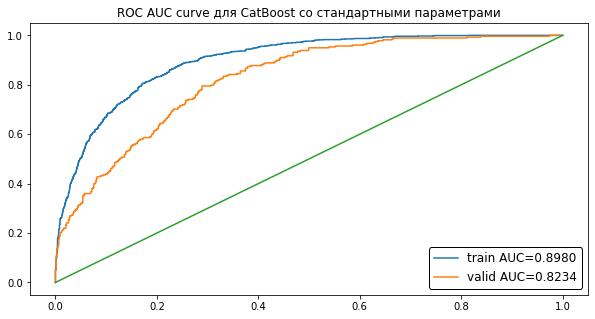

In [45]:
y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_valid_predicted = boosting_model.predict_proba(X_valid_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted) 
test_auc = roc_auc_score(y_valid, y_valid_predicted) 
 
plt.figure(figsize=(10,5)) 
plt.title('ROC AUC curve для CatBoost со стандартными параметрами') 
 
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc)) 
plt.plot(*roc_curve(y_valid, y_valid_predicted)[:2], label='valid AUC={:.4f}'.format(test_auc)) 
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame() 
legend_box.set_facecolor("white") 
legend_box.set_edgecolor("black") 
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100)) 
plt.show()

Получили 0.8980 на train, 0.8234 на valid

Теперь будем подбирать параметры n_estimators и learning_rate, обучать на train, и смотреть качество на valid

In [ ]:
n_estimators_candidates = [x for x in range(100, 501, 40)]
n_estimators_candidates

[100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

In [ ]:
learning_rate_candidates = np.linspace(0.00001, 0.1, 10)
learning_rate_candidates

array([1.000e-05, 1.112e-02, 2.223e-02, 3.334e-02, 4.445e-02, 5.556e-02,
       6.667e-02, 7.778e-02, 8.889e-02, 1.000e-01])

In [ ]:
0.04736894736842106

Вывел область поиска n_estimators и learning_rate

Теперь двумерным циклом будем перебирать сначала n_estimators, потом learning_rate

In [ ]:
roc_auc_scores = []
params_for_roc_auc = []

for n_estimators in n_estimators_candidates:
  for learning_rate in learning_rate_candidates:
    boosting_model = catboost.CatBoostClassifier(n_estimators=n_estimators, 
                                             cat_features=[x for x in range(3,19)], learning_rate=learning_rate)
    boosting_model.fit(X_train_origin, y_train)
    y_valid_predicted = boosting_model.predict_proba(X_valid_origin)[:, 1]
    valid_auc = roc_auc_score(y_valid, y_valid_predicted) 
    roc_auc_scores.append(valid_auc)
    params_for_roc_auc.append([n_estimators, learning_rate])

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.6931401	total: 26.5ms	remaining: 13.2s
1:	learn: 0.6931333	total: 62.1ms	remaining: 15.5s
2:	learn: 0.6931259	total: 76.7ms	remaining: 12.7s
3:	learn: 0.6931187	total: 90.9ms	remaining: 11.3s
4:	learn: 0.6931115	total: 110ms	remaining: 10.9s
5:	learn: 0.6931050	total: 129ms	remaining: 10.7s
6:	learn: 0.6930977	total: 146ms	remaining: 10.3s
7:	learn: 0.6930909	total: 160ms	remaining: 9.85s
8:	learn: 0.6930863	total: 165ms	remaining: 9.03s
9:	learn: 0.6930794	total: 185ms	remaining: 9.05s
10:	learn: 0.6930727	total: 202ms	remaining: 8.97s
11:	learn: 0.6930656	total: 218ms	remaining: 8.88s
12:	learn: 0.6930589	total: 236ms	remaining: 8.83s
13:	learn: 0.6930519	total: 253ms	remaining: 8.78s
14:	learn: 0.6930455	total: 260ms	remaining: 8.4s
15:	learn: 0.6930385	total: 280ms	remaining: 8.46s
16:	learn: 0.6930327	total: 288ms	remaining: 8.17s
17:	learn: 0.6930258	total: 301ms	remaining: 8.05s
18:	learn: 0.6930194	

In [ ]:
id = np.argmax(roc_auc_scores)

print(roc_auc_scores[id])
print(params_for_roc_auc[id])

0.83150090967021
[460, 0.011120000000000001]


Удалось найти параметры, при которых roc_auc на valid 0.8315, на стандартных параметрах был 0.8234

Также сделаем небольшой поиск на значении n_estimators=200, оно не попало в область нашего перебора, но хочется посмотреть работу модели, будем подбирать learning_rate

Для удобства поставил logging_level = 'Silent'

In [78]:
learning_rate_candidates_new = np.linspace(0.000001, 0.1, 20)

roc_auc_scores_new = []
params_for_roc_auc_new = []

for learning_rate in learning_rate_candidates_new:
  boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                            cat_features=[x for x in range(3,19)], learning_rate=learning_rate, logging_level = 'Silent')
  boosting_model.fit(X_train_origin, y_train)
  y_valid_predicted = boosting_model.predict_proba(X_valid_origin)[:, 1]
  valid_auc = roc_auc_score(y_valid, y_valid_predicted) 
  roc_auc_scores_new.append(valid_auc)
  params_for_roc_auc_new.append([200, learning_rate])

In [79]:
for i in range(20):
  print(roc_auc_scores_new[i])
  print(params_for_roc_auc_new[i])

0.8071337538441649
[200, 1e-06]
0.8204832796150756
[200, 0.0052641052631578955]
0.8256249942279809
[200, 0.01052721052631579]
0.8280838743639236
[200, 0.015790315789473687]
0.8302910944671734
[200, 0.021053421052631582]
0.8304896519241604
[200, 0.026316526315789478]
0.8304873431165208
[200, 0.03157963157894737]
0.8304850343088814
[200, 0.03684273684210527]
0.8295638200607678
[200, 0.042105842105263164]
0.8288457808849198
[200, 0.04736894736842106]
0.8297115837496882
[200, 0.052632052631578954]
0.8297900832094274
[200, 0.05789515789473685]
0.824678383095834
[200, 0.06315826315789475]
0.8286495322355723
[200, 0.06842136842105265]
0.825172467930662
[200, 0.07368447368421054]
0.8238656828067713
[200, 0.07894757894736842]
0.8215591839750279
[200, 0.08421068421052633]
0.8238772268449682
[200, 0.08947378947368423]
0.8177842834846373
[200, 0.09473689473684212]
0.8206956899178988
[200, 0.1]


Заметим, что найденный параметр learning_rate в переборе был 0.01112, попробуем параметр learning_rate побольше.

Например,  learning_rate = 0.03157963157894737 - он в ~2.9 раза больше - на нем качество на валидации достаточное высокое (0.8304). Попробуем сделать посылку и с этими параметрами также. Для разноообразия попробуем learning_rate = 0.04736894736842106 - он в ~4.5 раза больше - на нем качество на валидации неплохое - 0.8288.

Выпишите какое лучшее качество и с какими параметрами вам удалось получить.

Удалось найти параметры n_estimators = 460, learning_rate = 0.011120000000000001 при которых roc_auc на valid 0.8315

Построим roc-auc для модели при n_estimators = 460, learning_rate = 0.011120000000000001

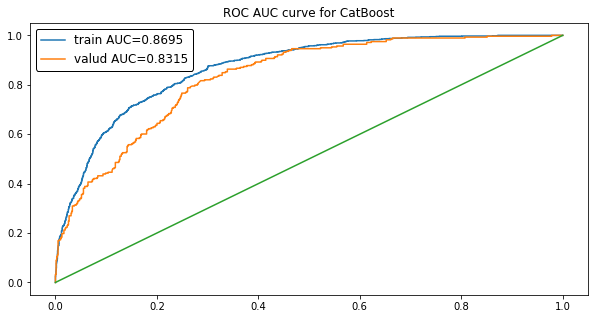

In [82]:
boosting_model = catboost.CatBoostClassifier(n_estimators=460, 
                                             cat_features=[x for x in range(3,19)], learning_rate=0.011120000000000001, logging_level = 'Silent')
boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_valid_predicted = boosting_model.predict_proba(X_valid_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted) 
valid_auc = roc_auc_score(y_valid, y_valid_predicted) 
 
plt.figure(figsize=(10,5)) 
plt.title('ROC AUC curve for CatBoost') 
 
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc)) 
plt.plot(*roc_curve(y_valid, y_valid_predicted)[:2], label='valud AUC={:.4f}'.format(valid_auc)) 
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame() 
legend_box.set_facecolor("white") 
legend_box.set_edgecolor("black") 
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100)) 
plt.show()

# Предсказания

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

Для отправки воспользуемся обучением на всем train c найденными параметрами. Выведем roc-auc, если использовать весь train.

Воспользуемся найденными параметрами

In [88]:
boosting_model = catboost.CatBoostClassifier(n_estimators=460, 
                                             cat_features=[x for x in range(3,19)], learning_rate=0.011120000000000001, logging_level = 'Silent')
boosting_model.fit(X_origin.values, y.values)

y_predicted = boosting_model.predict_proba(X_origin.values)[:, 1]
valid_auc = roc_auc_score(y.values, y_predicted) 
print(valid_auc)

0.8656726474522283


In [86]:
best_model = boosting_model

In [87]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
#submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index = False)

Сделаем посылку - получил 0.85098 на kaggle


Попробуем теперь параметры при n_estimators=200

In [90]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=[x for x in range(3,19)], learning_rate = 0.04736894736842106, logging_level = 'Silent')
boosting_model.fit(X_origin.values, y.values)

y_predicted = boosting_model.predict_proba(X_origin.values)[:, 1]
valid_auc = roc_auc_score(y.values, y_predicted) 
print(valid_auc)

0.8714203704582459


Сделал посылку - получил 0.85251 на kaggle

In [91]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=[x for x in range(3,19)], learning_rate=0.03157963157894737, logging_level = 'Silent')
boosting_model.fit(X_origin.values, y.values)

y_predicted = boosting_model.predict_proba(X_origin.values)[:, 1]
auc_score = roc_auc_score(y.values, y_predicted) 
print(auc_score)

0.8667154973500565


Сделал посылку - получил 0.85097 на kaggle

Лучшая посылка получила 0.85251

Мой ник на kaggle akmalashirmatov99